# Project 4

Team members: Leiwen Lin, Huiting Tang, Xiaoli Zhao, Ziyi Zhao

Individual Contribution: We held group meeting for 5 times and every one contributed a lot. Leiwen is mainly responsible for wrangling data, building up star schema and draw plotly plots. Huiting is mainly responsible for doing analysis and write description of analysis result. Xiaoli is mainly responsible for improving our code and Ziyi is responsible for integrate notebook and presentation. 

# Selection Data

In this project, we choose Austin 311 Unified Data (Utilities and City Services). It is about Non-emergency 311 call systems which is used increasingly in U.S. cities, offer a number of advantages. They give citizens a quick, convenient way to kvetch about problems in their neighborhoods, and get a response. We choose this dataset because Austin is famous for its strong data analytics industry. So, we want to explore their governmental database management by doing analysis on this dataset. Also, we want to know more about 311 call systems.
Data Source: https://data.austintexas.gov/Utilities-and-City-Services/311-Unified-Data/i26j-ai4z
We want to explore the pattern of service type by month, owning department and method. We attempt to answer the following qestions:
1. Which service type is the most common one?
2. Is there any pattern for service type records over month?
3. What method is used more often for call systems?
4. Is there any further pattern we can explore with other dataset?
The dataset is very clean and constructed so we don't have concerns about it. But what could be a challenge is that once we find the interesting pattern of the data, can we find out proper dataset to further explore the pattern.

In [1]:
!wget -nc https://s3.amazonaws.com/leiwen/dmfa/Data.csv

File ‘Data.csv’ already there; not retrieving.



# Wrangling data

In [2]:
from IPython.display import Image
url = "https://s3.amazonaws.com/leiwen/dmfa/too_big.jpg"
Image(url=url)

Trifacta cannot handle data larger than 100 migabyte, so we use pandas to do it.

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv("Data.csv")

In [5]:
data = data.dropna(axis = 0)

Drop null values.

In [6]:
data.dtypes

Service Request (SR) Number     object
SR Type Code                    object
SR Description                  object
Owning Department               object
Method Received                 object
SR Status                       object
Status Change Date              object
Created Date                    object
Last Update Date                object
Close Date                      object
SR Location                     object
Street Number                  float64
Street Name                     object
City                            object
Zip Code                         int64
County                          object
State Plane X Coordinate       float64
State Plane Y Coordinate       float64
Latitude Coordinate            float64
Longitude Coordinate           float64
(Latitude.Longitude)            object
Council District                 int64
Map Page                        object
Map Tile                        object
dtype: object

In [7]:
data["Zip Code"] = data["Zip Code"].astype("int")

In [8]:
data["Council District"] = data["Council District"].astype("int")

In [9]:
data.shape

(344794, 24)

In [10]:
data.dropna(axis = 0).shape

(344794, 24)

In [11]:
 !csvstat --count Data.csv

Row count: 344794


In [12]:
%load_ext sql

In [13]:
!dropdb --if-exists -U student project4

Create db 'project4'

In [14]:
!createdb -U student project4

In [15]:
%sql postgresql://student@/project4

'Connected: student@project4'

In [16]:
%%sql
DROP TABLE IF EXISTS facts;

Done.


[]

Create temporary fact table.

In [17]:
%%sql
DROP Table IF EXISTS facts;
CREATE TABLE facts (
SR_Number VARCHAR(30),
SR_Type_Code VARCHAR(30),
SR_Description VARCHAR(100),
Owning_Department VARCHAR(50),
Method_Received VARCHAR(30),
SR_Status VARCHAR(30),
Status_Change_Date TIMESTAMPTZ,
Created_Date TIMESTAMPTZ,
Last_Update_Date TIMESTAMPTZ,
Close_Date TIMESTAMPTZ,
SR_Location VARCHAR(500),
Street_Number VARCHAR(500),
Street_Name VARCHAR(100),
City VARCHAR(100),
Zip_Code INTEGER,
County VARCHAR(100),
State_Plane_X_Coordinate VARCHAR(100),
State_Plane_Y_Coordinate VARCHAR(100),
Latitude_Coordinate NUMERIC,
Longitude_Coordinate NUMERIC,
Latitude_Longitude VARCHAR(500),
Council_District INTEGER,
Map_Page VARCHAR(30),
Map_Tile VARCHAR(30)
)

Done.
Done.


[]

Here is our Star Schema.

In [18]:
from IPython.display import Image
url = "https://s3.amazonaws.com/leiwen/dmfa/star_schema.png"
Image(url=url)

In [19]:
pwd

'/home/ubuntu/Project4'

In [20]:
%%sql
COPY facts FROM '/home/ubuntu/Project4/Data.csv'
CSV
HEADER;

344794 rows affected.


[]

Let us take a look.

In [21]:
%%sql
SELECT *
FROM facts
LImit 5;

5 rows affected.


sr_number,sr_type_code,sr_description,owning_department,method_received,sr_status,status_change_date,created_date,last_update_date,close_date,sr_location,street_number,street_name,city,zip_code,county,state_plane_x_coordinate,state_plane_y_coordinate,latitude_coordinate,longitude_coordinate,latitude_longitude,council_district,map_page,map_tile
16-00108244,TRASIGMA,Traffic Signal - Maintenance,Transportation,Phone,Duplicate (closed),2016-05-06 19:51:27+00:00,2016-05-06 19:51:27+00:00,2016-05-06 19:51:27+00:00,2016-05-06 19:51:27+00:00,"6001 MANCHACA RD, AUSTIN, TX 78745",6001.0,MANCHACA,AUSTIN,78745,TRAVIS,3096240.5,10050194.0,30.212694899999995,-97.8015215,"(30.2126949, -97.8015215)",5,643M,MF17
16-00108269,TRASIGMA,Traffic Signal - Maintenance,Transportation,Phone,Duplicate (closed),2016-05-06 20:22:56+00:00,2016-05-06 20:22:56+00:00,2016-05-06 20:22:56+00:00,2016-05-06 20:22:56+00:00,"6001 MANCHACA RD, AUSTIN, TX 78745",6001.0,MANCHACA,AUSTIN,78745,TRAVIS,3096240.5,10050194.0,30.212694899999995,-97.8015215,"(30.2126949, -97.8015215)",5,643M,MF17
16-00324071,SWSDEADA,ARR Dead Animal Collection,Austin Resource Recovery,Phone,Closed,2016-12-15 09:05:43+00:00,2016-12-15 06:41:40+00:00,2016-12-15 09:05:43+00:00,2016-12-15 09:05:43+00:00,"2200 E OLTORF ST, AUSTIN, TX 78741",2200.0,OLTORF,AUSTIN,78741,TRAVIS,3118116.50749136,10057053.9397969,30.23016411,-97.73177647,"(30.23016411, -97.73177647)",3,615X,MJ19
16-00108062,TRASIGMA,Traffic Signal - Maintenance,Transportation,Phone,Duplicate (closed),2016-05-10 16:56:52+00:00,2016-05-06 17:03:45+00:00,2016-05-10 16:56:52+00:00,2016-05-10 16:56:52+00:00,"8401 N CAPITAL OF TEXAS HWY NB, AUSTIN, TX 78759",8401.0,CAPITAL OF TEXAS,AUSTIN,78759,TRAVIS,3105863.35797435,10113092.5341337,30.38498865,-97.76647071,"(30.38498865, -97.76647071)",10,494L,MH32
16-00107654,STREETL2,Street Light Issue- Address,Austin Energy Department,Phone,Closed,2016-05-10 06:58:01+00:00,2016-05-06 10:28:16+00:00,2016-05-10 06:58:01+00:00,2016-05-10 06:58:01+00:00,"300 WEST AVE, AUSTIN, TX 78703",300.0,WEST,AUSTIN,78703,TRAVIS,3111493.73999999,10070696.54,30.26808964,-97.75173887,"(30.26808964, -97.75173887)",9,584V,MH22


Create hour table.

In [22]:
%%sql
DROP TABLE IF EXISTS hour;

CREATE TABLE hour (
    hour_key SERIAL PRIMARY KEY,
    hour CHAR(19),
    day CHAR(10),
    year INTEGER,
    month_of_year_str VARCHAR(12),
    month_of_year INTEGER,
    day_of_month INTEGER,
    day_of_week_str CHAR(9),
    day_of_week INTEGER,
    is_weekend BOOLEAN,
    is_weekday BOOLEAN,
    hour_of_day INTEGER,
    quarter_of_year INTEGER
);

Done.
Done.


[]

In [23]:
%%sql
INSERT INTO hour (hour, day, year, month_of_year_str, month_of_year, day_of_month, 
                  day_of_week_str, day_of_week, is_weekend, is_weekday, 
                  hour_of_day, quarter_of_year)
SELECT DISTINCT TO_CHAR(Status_Change_Date, 'YYYY-MM-DD HH24:00:00') AS hour,
    TO_CHAR(Status_Change_Date, 'YYYY-MM-DD') AS day, 
    CAST(TO_CHAR(Status_Change_Date, 'YYYY') AS INTEGER) AS year,
    TO_CHAR(Status_Change_Date, 'Month') AS month_of_year_str,
    CAST(TO_CHAR(Status_Change_Date, 'MM') AS INTEGER) AS month_of_year,
    CAST(TO_CHAR(Status_Change_Date, 'DD') AS INTEGER) AS day_of_month,
    TO_CHAR(Status_Change_Date, 'Day') AS day_of_week_str,
    CAST(TO_CHAR(Status_Change_Date, 'D') AS INTEGER) AS day_of_week,
    CASE WHEN CAST(TO_CHAR(Status_Change_Date, 'D') AS INTEGER) IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS is_weekend,
    CASE WHEN CAST(TO_CHAR(Status_Change_Date, 'D') AS INTEGER) NOT IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS is_weekday,
    CAST(TO_CHAR(Status_Change_Date, 'HH24') AS INTEGER) AS hour_of_day,
    CAST(TO_CHAR(Status_Change_Date, 'Q') AS INTEGER) AS quarter_of_year
FROM facts
UNION
SELECT DISTINCT TO_CHAR(Created_Date, 'YYYY-MM-DD HH24:00:00') AS hour,
    TO_CHAR(Created_Date, 'YYYY-MM-DD') AS day, 
    CAST(TO_CHAR(Created_Date, 'YYYY') AS INTEGER) AS year,
    TO_CHAR(Created_Date, 'Month') AS month_of_year_str,
    CAST(TO_CHAR(Created_Date, 'MM') AS INTEGER) AS month_of_year,
    CAST(TO_CHAR(Created_Date, 'DD') AS INTEGER) AS day_of_month,
    TO_CHAR(Created_Date, 'Day') AS day_of_week_str,
    CAST(TO_CHAR(Created_Date, 'D') AS INTEGER) AS day_of_week,
    CASE WHEN CAST(TO_CHAR(Created_Date, 'D') AS INTEGER) IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS is_weekend,
    CASE WHEN CAST(TO_CHAR(Created_Date, 'D') AS INTEGER) NOT IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS is_weekday,
    CAST(TO_CHAR(Created_Date, 'HH24') AS INTEGER) AS hour_of_day,
    CAST(TO_CHAR(Created_Date, 'Q') AS INTEGER) AS quarter_of_year
FROM facts
UNION
SELECT DISTINCT TO_CHAR(Last_Update_Date, 'YYYY-MM-DD HH24:00:00') AS hour,
    TO_CHAR(Last_Update_Date, 'YYYY-MM-DD') AS day, 
    CAST(TO_CHAR(Last_Update_Date, 'YYYY') AS INTEGER) AS year,
    TO_CHAR(Last_Update_Date, 'Month') AS month_of_year_str,
    CAST(TO_CHAR(Last_Update_Date, 'MM') AS INTEGER) AS month_of_year,
    CAST(TO_CHAR(Last_Update_Date, 'DD') AS INTEGER) AS day_of_month,
    TO_CHAR(Last_Update_Date, 'Day') AS day_of_week_str,
    CAST(TO_CHAR(Last_Update_Date, 'D') AS INTEGER) AS day_of_week,
    CASE WHEN CAST(TO_CHAR(Last_Update_Date, 'D') AS INTEGER) IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS is_weekend,
    CASE WHEN CAST(TO_CHAR(Last_Update_Date, 'D') AS INTEGER) NOT IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS is_weekday,
    CAST(TO_CHAR(Last_Update_Date, 'HH24') AS INTEGER) AS hour_of_day,
    CAST(TO_CHAR(Last_Update_Date, 'Q') AS INTEGER) AS quarter_of_year
FROM facts
UNION
SELECT DISTINCT TO_CHAR(Last_Update_Date, 'YYYY-MM-DD HH24:00:00') AS hour,
    TO_CHAR(Last_Update_Date, 'YYYY-MM-DD') AS day, 
    CAST(TO_CHAR(Last_Update_Date, 'YYYY') AS INTEGER) AS year,
    TO_CHAR(Last_Update_Date, 'Month') AS month_of_year_str,
    CAST(TO_CHAR(Last_Update_Date, 'MM') AS INTEGER) AS month_of_year,
    CAST(TO_CHAR(Last_Update_Date, 'DD') AS INTEGER) AS day_of_month,
    TO_CHAR(Last_Update_Date, 'Day') AS day_of_week_str,
    CAST(TO_CHAR(Last_Update_Date, 'D') AS INTEGER) AS day_of_week,
    CASE WHEN CAST(TO_CHAR(Last_Update_Date, 'D') AS INTEGER) IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS is_weekend,
    CASE WHEN CAST(TO_CHAR(Last_Update_Date, 'D') AS INTEGER) NOT IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS is_weekday,
    CAST(TO_CHAR(Last_Update_Date, 'HH24') AS INTEGER) AS hour_of_day,
    CAST(TO_CHAR(Last_Update_Date, 'Q') AS INTEGER) AS quarter_of_year
FROM facts
UNION
SELECT DISTINCT TO_CHAR(Close_Date, 'YYYY-MM-DD HH24:00:00') AS hour,
    TO_CHAR(Close_Date, 'YYYY-MM-DD') AS day, 
    CAST(TO_CHAR(Close_Date, 'YYYY') AS INTEGER) AS year,
    TO_CHAR(Close_Date, 'Month') AS month_of_year_str,
    CAST(TO_CHAR(Close_Date, 'MM') AS INTEGER) AS month_of_year,
    CAST(TO_CHAR(Close_Date, 'DD') AS INTEGER) AS day_of_month,
    TO_CHAR(Close_Date, 'Day') AS day_of_week_str,
    CAST(TO_CHAR(Close_Date, 'D') AS INTEGER) AS day_of_week,
    CASE WHEN CAST(TO_CHAR(Close_Date, 'D') AS INTEGER) IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS is_weekend,
    CASE WHEN CAST(TO_CHAR(Close_Date, 'D') AS INTEGER) NOT IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS is_weekday,
    CAST(TO_CHAR(Close_Date, 'HH24') AS INTEGER) AS hour_of_day,
    CAST(TO_CHAR(Close_Date, 'Q') AS INTEGER) AS quarter_of_year
FROM facts;



30318 rows affected.


[]

In [24]:
%%sql
SELECT * from hour limit 5;

5 rows affected.


hour_key,hour,day,year,month_of_year_str,month_of_year,day_of_month,day_of_week_str,day_of_week,is_weekend,is_weekday,hour_of_day,quarter_of_year
1,2015-10-16 06:00:00,2015-10-16,2015,October,10,16,Friday,6,False,True,6,4
2,2017-09-22 00:00:00,2017-09-22,2017,September,9,22,Friday,6,False,True,0,3
3,2014-01-26 16:00:00,2014-01-26,2014,January,1,26,Sunday,1,True,False,16,1
4,2015-09-24 16:00:00,2015-09-24,2015,September,9,24,Thursday,5,False,True,16,3
5,2017-03-15 08:00:00,2017-03-15,2017,March,3,15,Wednesday,4,False,True,8,1


Create hour key in fact table and update hour key into fact table.

In [25]:
%%sql
ALTER TABLE facts
ADD COLUMN Status_Change_Date_key INTEGER,
ADD CONSTRAINT fk_Status_Change_Date_key
    FOREIGN KEY (Status_Change_Date_key)
    REFERENCES hour (hour_key),
ADD COLUMN Created_Date_key INTEGER,
ADD CONSTRAINT fk_Created_Date_key
    FOREIGN KEY (Created_Date_key)
    REFERENCES hour (hour_key),
ADD COLUMN Last_Update_Date_key INTEGER,
ADD CONSTRAINT fk_Last_Update_Date_key
    FOREIGN KEY (Last_Update_Date_key)
    REFERENCES hour (hour_key), 
ADD COLUMN Close_Date_key INTEGER,
ADD CONSTRAINT fk_Close_Date_key
    FOREIGN KEY (Close_Date_key)
    REFERENCES hour (hour_key);

Done.


[]

In [26]:
%%sql
Select status_change_date,hour.hour_key
FROM facts,hour
WHERE TO_CHAR(facts.status_change_date, 'YYYY-MM-DD HH24:00:00') = hour.hour
limit 10;

10 rows affected.


status_change_date,hour_key
2016-05-06 19:51:27+00:00,18215
2016-05-06 20:22:56+00:00,24850
2016-12-15 09:05:43+00:00,29125
2016-05-10 16:56:52+00:00,28537
2016-05-10 06:58:01+00:00,2179
2016-05-11 16:41:32+00:00,10402
2016-05-11 16:42:25+00:00,10402
2016-05-11 16:43:10+00:00,10402
2016-05-11 16:43:54+00:00,10402
2016-10-18 09:47:40+00:00,26582


In [27]:
%%sql
UPDATE facts
SET Status_Change_Date_key = hour.hour_key
FROM hour
WHERE TO_CHAR(facts.status_change_date, 'YYYY-MM-DD HH24:00:00') = hour.hour;


344794 rows affected.


[]

In [28]:
%%sql
UPDATE facts
SET Created_Date_key = hour.hour_key
FROM hour
WHERE hour.hour  = TO_CHAR(facts.Created_Date, 'YYYY-MM-DD HH24:00:00')

344794 rows affected.


[]

In [29]:
%%sql
UPDATE facts
SET Last_Update_Date_key = hour.hour_key
FROM hour
WHERE hour.hour  = TO_CHAR(facts.Last_Update_Date, 'YYYY-MM-DD HH24:00:00')

344794 rows affected.


[]

In [30]:
%%sql
UPDATE facts
SET Close_Date_key = hour.hour_key
FROM hour
WHERE hour.hour  = TO_CHAR(facts.Close_Date, 'YYYY-MM-DD HH24:00:00')

344794 rows affected.


[]

In [31]:
%%sql
SELECT * from facts limit 5;

5 rows affected.


sr_number,sr_type_code,sr_description,owning_department,method_received,sr_status,status_change_date,created_date,last_update_date,close_date,sr_location,street_number,street_name,city,zip_code,county,state_plane_x_coordinate,state_plane_y_coordinate,latitude_coordinate,longitude_coordinate,latitude_longitude,council_district,map_page,map_tile,status_change_date_key,created_date_key,last_update_date_key,close_date_key
16-00185678,PWBICYCL,Bicycle Issues,Transportation,Phone,Closed,2016-07-21 09:14:00+00:00,2016-07-20 10:26:00+00:00,2016-07-21 09:14:00+00:00,2016-07-21 09:14:00+00:00,"900 E 38TH ST, AUSTIN, TX 78751",900.0,38TH,AUSTIN,78751,TRAVIS,3120253.672,10080990.1,30.29582303,-97.723233,"(30.29582303, -97.723233)",9,585C,MK24,23143,19398,23143,23143
15-00144382,SBPOTREP,Pothole Repair,Public Works,Phone,Closed,2015-06-26 14:51:10+00:00,2015-06-25 15:13:58+00:00,2015-06-26 14:51:10+00:00,2015-06-26 14:51:10+00:00,"3811 E 12TH ST, AUSTIN, TX",3811.0,12TH,AUSTIN,78721,TRAVIS,3130796.83,10074307.53,30.27676938,-97.69033868,"(30.27676938, -97.69033868)",1,586P,ML23,25210,566,25210,25210
14-00087084,SIGNNEWT,Sign - New,Transportation,Web,Closed,2014-05-12 10:34:38+00:00,2014-05-08 11:18:24+00:00,2014-05-12 10:34:39+00:00,2014-05-12 10:34:38+00:00,"8200 PAX DR, AUSTIN, TX 78736",8200.0,PAX,AUSTIN,78736,TRAVIS,3068705.0,10061222.0,30.24470333,-97.88790622,"(30.24470333, -97.88790622)",8,611L,MB20,8989,24650,8989,8989
14-00132509,SBDEBROW,Debris in Street,Public Works,Phone,Closed,2014-07-02 09:31:38+00:00,2014-07-02 09:16:28+00:00,2014-07-02 09:31:39+00:00,2014-07-02 09:31:38+00:00,"1750 W 5TH ST, AUSTIN, TX",1750.0,5TH,AUSTIN,78703,TRAVIS,3107115.37,10073262.92,30.27542286,-97.76541674,"(30.27542286, -97.76541674)",9,584Q,MH23,19916,19916,19916,19916
14-00191823,SBSIDERE,Sidewalk Repair,Public Works,Phone,Closed,2014-09-10 16:14:31+00:00,2014-09-09 11:57:42+00:00,2014-09-10 16:14:32+00:00,2014-09-10 16:14:31+00:00,"204 E 33RD ST, AUSTIN, TX",204.0,33RD,AUSTIN,78705,TRAVIS,3116691.0,10081342.0,30.29701967,-97.73449246,"(30.29701967, -97.73449246)",9,585B,MJ24,13188,6895,13188,13188


We can now remove some columns in `facts` that are not facts nor foreign keys of dimension tables.

In [32]:
%%sql
ALTER TABLE facts
DROP COLUMN status_change_date,
DROP COLUMN created_date,
DROP COLUMN close_date,
DROP COLUMN last_update_date;

Done.


[]

Then create 'method' table.

In [33]:
%%sql
DROP TABLE IF EXISTS method;

CREATE TABLE method (
    Method_key SERIAL PRIMARY KEY,
    Method VARCHAR(64)
);

Done.
Done.


[]

In [34]:
%%sql
SELECT Method_Received,count(Method_Received)
FROM facts 
GROUP BY 1;

17 rows affected.


method_received,count
Mobile Devi,1
Mass Entry,6436
CSR - Follow On SR,33
Web,20585
Social Media,1
Open311,185
CSR - Follo,1
E-Mail,156
Interface,4
Field Reque,31


In [35]:
%%sql
INSERT INTO method (Method)
SELECT DISTINCT Method_Received as method
FROM facts;

17 rows affected.


[]

In [36]:
%%sql
ALTER TABLE facts
ADD COLUMN Method_key INTEGER,
ADD CONSTRAINT fk_Method_key
    FOREIGN KEY (Method_key)
    REFERENCES method (Method_key);

Done.


[]

In [37]:
%%sql
UPDATE facts
SET Method_key = method.method_key
FROM method
WHERE facts.Method_Received = method.Method;

344794 rows affected.


[]

In [38]:
%%sql
ALTER TABLE facts
DROP COLUMN Method_Received;

Done.


[]

Create 'Location' table

In [39]:
%%sql
DROP TABLE  IF EXISTS Location;

SELECT Distinct SR_Location,
Street_Number,
Street_Name,
City,
Zip_Code,
County,
State_Plane_X_Coordinate,
State_Plane_Y_Coordinate,
Latitude_Coordinate,
Longitude_Coordinate,
Council_District,
Map_Page,
Map_Tile
INTO Location
FROM facts;

Done.
194431 rows affected.


[]

In [40]:
%%sql
ALTER TABLE Location
ADD COLUMN location_key SERIAL PRIMARY KEY;

Done.


[]

Alter fact table and update method_key into fact table.

In [41]:
%%sql
ALTER TABLE facts
ADD COLUMN location_key INTEGER,
ADD CONSTRAINT fk_location_key
    FOREIGN KEY (location_key)
    REFERENCES location (location_key);

Done.


[]

In [42]:
%%sql
SELECT *
FROM location
limit 10 ;

10 rows affected.


sr_location,street_number,street_name,city,zip_code,county,state_plane_x_coordinate,state_plane_y_coordinate,latitude_coordinate,longitude_coordinate,council_district,map_page,map_tile,location_key
"0 BASTROP HWY NB, AUSTIN, TX",0.0,BASTROP HWY,AUSTIN,78725,TRAVIS,3131078.8046126,10062985.5990243,30.24562909,-97.69029776,3,616K,ML20,1
"0 E US 290 HWY EB, AUSTIN, TX",0.0,290,AUSTIN,78724,TRAVIS,3136294.85582263,10092147.3753045,30.32544739,-97.67157404,1,558A,MQ27,2
"0 E US 290 HWY EB, AUSTIN, TX",0.0,290,AUSTIN,78724,TRAVIS,3136294.856,10092147.38,30.32544739,-97.67157404,1,558A,MQ27,3
"0 N SH 130 NB, AUSTIN, TX",0.0,130,AUSTIN,78653,TRAVIS,3168463.31273532,10087069.4062448,30.30933259,-97.57004581,1,559P,MS26,4
"0 RESEARCH BLVD SVRD NB, AUSTIN, TX 78758",0.0,RESEARCH BLVD SVRD,AUSTIN,78758,TRAVIS,3118828.582,10109080.93,30.37313223,-97.72566097,7,495Y,MK31,5
"0 SERVICE RD N/A N/A N/A, AUSTIN, TX 78758",0.0,SERVICE,AUSTIN,78719,TRAVIS,3136878.89302637,10048964.4706612,30.20670769,-97.67299638,2,646R,MM17,6
"10000 ANAHUAC TRL, AUSTIN, TX",10000.0,ANAHUAC,AUSTIN,78747,TRAVIS,3101033.93605819,10029672.133327,30.15598249,-97.78783672,5,704A,MG12,7
"10000 AUSTRAL CV, AUSTIN, TX 78739",10000.0,AUSTRAL,AUSTIN,78739,TRAVIS,3072903.00042677,10043209.001360001,30.19493282,-97.87587493,8,641Z,MB16,8
"10000 BARRINGTON CV, AUSTIN, TX",10000.0,BARRINGTON,AUSTIN,78753,TRAVIS,3134923.19425932,10104507.5227323,30.35951334,-97.67498423,4,526H,MM30,9
"10000 BILBROOK PL, AUSTIN, TX",10000.0,BILBROOK,AUSTIN,78748,TRAVIS,3091504.72891257,10033777.8454873,30.16786448,-97.81768559,5,673T,ME13,10


In [43]:
%%sql
Select count(*)
FROM location as l,facts as f
WHERE
f.sr_location= l.sr_location AND
f.SR_Location = l.SR_Location AND
f.Street_Number = l.Street_Number AND
f.Street_Name = l.Street_Name AND
f.City = l.City AND
f.Zip_Code = l.Zip_Code AND
f.County = l.County AND
f.State_Plane_X_Coordinate = l.State_Plane_X_Coordinate AND
f.State_Plane_Y_Coordinate = l.State_Plane_Y_Coordinate AND
f.Council_District = l.Council_District  AND
f.Latitude_Coordinate = l.Latitude_Coordinate AND
f.Longitude_Coordinate = l.Longitude_Coordinate AND
f.Map_Page = l.Map_Page AND
f.Map_Tile = l.Map_Tile;

1 rows affected.


count
344794


In [44]:
%%sql
UPDATE facts as f
SET location_key = l.location_key
FROM location as l
WHERE 
f.sr_location= l.sr_location AND
f.SR_Location = l.SR_Location AND
f.Street_Number = l.Street_Number AND
f.Street_Name = l.Street_Name AND
f.City = l.City AND
f.Zip_Code = l.Zip_Code AND
f.County = l.County AND
f.State_Plane_X_Coordinate = l.State_Plane_X_Coordinate AND
f.State_Plane_Y_Coordinate = l.State_Plane_Y_Coordinate AND
f.Council_District = l.Council_District  AND
f.Latitude_Coordinate = l.Latitude_Coordinate AND
f.Longitude_Coordinate = l.Longitude_Coordinate AND
f.Map_Page = l.Map_Page AND
f.Map_Tile = l.Map_Tile;


344794 rows affected.


[]

In [45]:
%%sql
SELECT *
FROM facts
LIMIT 5;

5 rows affected.


sr_number,sr_type_code,sr_description,owning_department,sr_status,sr_location,street_number,street_name,city,zip_code,county,state_plane_x_coordinate,state_plane_y_coordinate,latitude_coordinate,longitude_coordinate,latitude_longitude,council_district,map_page,map_tile,status_change_date_key,created_date_key,last_update_date_key,close_date_key,method_key,location_key
14-00191823,SBSIDERE,Sidewalk Repair,Public Works,Closed,"204 E 33RD ST, AUSTIN, TX",204.0,33RD,AUSTIN,78705,TRAVIS,3116691.0,10081342.0,30.29701967,-97.73449246,"(30.29701967, -97.73449246)",9,585B,MJ24,13188,6895,13188,13188,15,63938
15-00149607,SBPOTREP,Pothole Repair,Public Works,Closed,"3800 BALCONES DR, AUSTIN, TX",3800.0,BALCONES,AUSTIN,78731,TRAVIS,3106275.0,10088334.0,30.31690452,-97.76697688,"(30.31690452, -97.76697688)",10,554L,MH26,749,1503,749,749,15,100147
15-00193118,SBPOTREP,Pothole Repair,Public Works,Closed,"6510 LAIRD DR, AUSTIN, TX",6510.0,LAIRD,AUSTIN,78757,TRAVIS,3115439.0,10097074.0,30.34034494,-97.73729527,"(30.34034494, -97.73729527)",7,525T,MJ28,26842,20098,26842,26842,15,148583
15-00156133,CODECOMP,Austin Code - Request Code Officer,Austin Code Department,Closed,"8900 TINA CT, AUSTIN, TX",8900.0,TINA,AUSTIN,78758,TRAVIS,3126060.5479102,10104367.132942,30.35970664,-97.7030874,"(30.35970664, -97.7030874)",4,526E,ML30,10670,22359,10670,10670,15,182972
15-00151017,ARRBRUBU,ARR Brush and Bulk,Austin Resource Recovery,Closed,"2114 OXFORD AVE, AUSTIN, TX",2114.0,OXFORD,AUSTIN,78704,TRAVIS,3105342.75,10063557.0,30.24885503,-97.77173871,"(30.24885503, -97.77173871)",5,614K,MG20,17765,20410,17765,17765,15,67057


Drop redundant columns.

In [46]:
%%sql
ALTER TABLE facts
DROP COLUMN SR_Location,
DROP COLUMN Street_Number,
DROP COLUMN Street_Name,
DROP COLUMN City,
DROP COLUMN Zip_Code,
DROP COLUMN County,
DROP COLUMN State_Plane_X_Coordinate,
DROP COLUMN State_Plane_Y_Coordinate,
DROP COLUMN latitude_coordinate,
DROP COLUMN longitude_coordinate,
DROP COLUMN latitude_longitude,
DROP COLUMN council_district,
DROP COLUMN map_page,
DROP COLUMN map_tile;

Done.


[]

In [47]:
%%sql
SELECT *
FROM facts
LIMIT 5;

5 rows affected.


sr_number,sr_type_code,sr_description,owning_department,sr_status,status_change_date_key,created_date_key,last_update_date_key,close_date_key,method_key,location_key
15-00156133,CODECOMP,Austin Code - Request Code Officer,Austin Code Department,Closed,10670,22359,10670,10670,15,182972
15-00151017,ARRBRUBU,ARR Brush and Bulk,Austin Resource Recovery,Closed,17765,20410,17765,17765,15,67057
15-00164213,SBPOTREP,Pothole Repair,Public Works,Closed,15184,26409,15184,15184,4,2664
15-00197316,SBDEBROW,Debris in Street,Public Works,Closed,18080,23995,18080,18080,15,28732
16-00002457,PWBICYCL,Bicycle Issues,Transportation,Closed,5368,15236,5368,5368,15,70406


Create 'Service_type' table

In [48]:
%%sql
DROP TABLE  IF EXISTS Service_type;

SELECT Distinct
sr_type_code,
sr_description,
owning_department
INTO Service_type
FROM facts;

Done.
146 rows affected.


[]

In [49]:
%%sql
ALTER TABLE Service_type
ADD COLUMN Service_type_key SERIAL PRIMARY KEY;

Done.


[]

In [50]:
%%sql
ALTER TABLE facts
ADD COLUMN Service_type_key INTEGER,
ADD CONSTRAINT fk_Service_type_key
    FOREIGN KEY (Service_type_key)
    REFERENCES Service_type (Service_type_key);

Done.


[]

Update Service_type_key into fact table.

In [51]:
%%sql
Select count(*)
FROM Service_type as s,facts as f
WHERE
s.sr_type_code = f.sr_type_code AND
s.sr_description = f.sr_description AND
s.owning_department = f.owning_department;

1 rows affected.


count
344794


In [52]:
%%sql
UPDATE facts as f
SET Service_type_key = s.Service_type_key
FROM Service_type as s
WHERE 
s.sr_type_code = f.sr_type_code AND
s.sr_description = f.sr_description AND
s.owning_department = f.owning_department;

344794 rows affected.


[]

In [53]:
%%sql
SELECT *
FROM facts
LIMIT 5;

5 rows affected.


sr_number,sr_type_code,sr_description,owning_department,sr_status,status_change_date_key,created_date_key,last_update_date_key,close_date_key,method_key,location_key,service_type_key
16-00002457,PWBICYCL,Bicycle Issues,Transportation,Closed,5368,15236,5368,5368,15,70406,88
15-00303997,SBPOTREP,Pothole Repair,Public Works,Resolved,21920,3836,21789,21920,15,192585,105
15-00288634,SIGNNEWT,Sign - New,Transportation,Closed,25255,21416,25255,25255,15,15481,117
16-00073334,SBPOTREP,Pothole Repair,Public Works,Closed,13847,11807,9829,13847,4,85122,105
17-00023691,SBSIDERE,Sidewalk Repair,Public Works,Closed,25348,6722,25348,25348,4,176379,108


In [54]:
%%sql
ALTER TABLE facts
DROP COLUMN sr_type_code,
DROP COLUMN sr_description,
DROP COLUMN owning_department;

Done.


[]

We finished the star schema.

In [55]:
from IPython.display import Image
url = "https://s3.amazonaws.com/leiwen/dmfa/star_schema.jpg"
Image(url=url)

Verification of Star Schema

In [56]:
%%sql
SELECT *
FROM facts
LIMIT 5;

5 rows affected.


sr_number,sr_status,status_change_date_key,created_date_key,last_update_date_key,close_date_key,method_key,location_key,service_type_key
17-00023691,Closed,25348,6722,25348,25348,4,176379,108
16-00266732,Closed,14777,15035,14777,14777,15,120691,105
14-00004887,Closed,3955,28106,3955,3955,15,42444,104
14-00005410,Closed,15755,25131,15755,15755,15,62503,105
14-00007749,Closed,4629,16669,16042,4629,15,172096,104


In [57]:
%%sql
SELECT *
FROM hour
LIMIT 5;

5 rows affected.


hour_key,hour,day,year,month_of_year_str,month_of_year,day_of_month,day_of_week_str,day_of_week,is_weekend,is_weekday,hour_of_day,quarter_of_year
1,2015-10-16 06:00:00,2015-10-16,2015,October,10,16,Friday,6,False,True,6,4
2,2017-09-22 00:00:00,2017-09-22,2017,September,9,22,Friday,6,False,True,0,3
3,2014-01-26 16:00:00,2014-01-26,2014,January,1,26,Sunday,1,True,False,16,1
4,2015-09-24 16:00:00,2015-09-24,2015,September,9,24,Thursday,5,False,True,16,3
5,2017-03-15 08:00:00,2017-03-15,2017,March,3,15,Wednesday,4,False,True,8,1


In [58]:
%%sql
SELECT *
FROM Method
LIMIT 5;

5 rows affected.


method_key,method
1,Mobile Devi
2,Mass Entry
3,CSR - Follow On SR
4,Web
5,Social Media


In [59]:
%%sql
SELECT *
FROM Location
LIMIT 5;

5 rows affected.


sr_location,street_number,street_name,city,zip_code,county,state_plane_x_coordinate,state_plane_y_coordinate,latitude_coordinate,longitude_coordinate,council_district,map_page,map_tile,location_key
"0 BASTROP HWY NB, AUSTIN, TX",0.0,BASTROP HWY,AUSTIN,78725,TRAVIS,3131078.8046126,10062985.5990243,30.24562909,-97.69029776,3,616K,ML20,1
"0 E US 290 HWY EB, AUSTIN, TX",0.0,290,AUSTIN,78724,TRAVIS,3136294.85582263,10092147.3753045,30.32544739,-97.67157404,1,558A,MQ27,2
"0 E US 290 HWY EB, AUSTIN, TX",0.0,290,AUSTIN,78724,TRAVIS,3136294.856,10092147.38,30.32544739,-97.67157404,1,558A,MQ27,3
"0 N SH 130 NB, AUSTIN, TX",0.0,130,AUSTIN,78653,TRAVIS,3168463.31273532,10087069.4062448,30.30933259,-97.57004581,1,559P,MS26,4
"0 RESEARCH BLVD SVRD NB, AUSTIN, TX 78758",0.0,RESEARCH BLVD SVRD,AUSTIN,78758,TRAVIS,3118828.582,10109080.93,30.37313223,-97.72566097,7,495Y,MK31,5


In [60]:
%%sql
SELECT *
FROM Service_type
LIMIT 5;

5 rows affected.


sr_type_code,sr_description,owning_department,service_type_key
ACBITE2,Animal Bite,Animal Services Office,1
ACCOYTE,Coyote Complaints,Animal Services Office,2
ACFOUND,Found Animal - Pick Up,Animal Services Office,3
ACINFORM,Animal Control - Assistance Request,Animal Services Office,4
ACLOANIM,Loose Animal (not dog),Animal Services Office,5


## Analysis 

**We use plotly to do visulization. To use plotly, please install it in the EC2's terminal by input "pip install plotly --user".
<br>
Since the figure of plotly won't save when we close this file, here's a clarification, we have run all codes, but the figure won't show. Please run following codes, or review figures that we saved in our submitted folder.**

In [61]:
#plotly.offline doesn't push your charts to the clouds
import plotly.offline as pyo
#allows us to create the Data and Figure objects
from plotly.graph_objs import *
#plotly.plotly pushes your charts to the cloud  
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
#pandas is a data analysis library
import pandas as pd
from pandas import DataFrame

In [62]:
import pandas.io.sql as pdsql
import psycopg2

In [63]:
conn = psycopg2.connect("dbname='project4' user='student' host='localhost' password=''")

### 1. Number of cases for different service type

In [64]:
%%sql
SELECT  Service_type.sr_description, COUNT(*) AS count 
FROM facts 
JOIN Service_type ON facts.Service_type_key = Service_type.Service_type_key 
GROUP BY 1 
ORDER BY count DESC 
LIMIT 10;

10 rows affected.


sr_description,count
Austin Code - Request Code Officer,75968
ARR Dead Animal Collection,19227
ARR Missed Recycling,19082
Loose Dog,17915
Animal Control - Assistance Request,16163
Street Light Issue- Address,13865
ARR Missed Yard Trimmings /Organics,12749
Graffiti Abatement,11883
Water Waste Report,11847
Injured / Sick Animal,10888


In [65]:
temp = pdsql.read_sql('''SELECT Service_type.sr_type_code, Service_type.sr_description, COUNT(*) AS count 
FROM facts
JOIN Service_type ON facts.Service_type_key = Service_type.Service_type_key 
GROUP BY 1,2 
ORDER BY count DESC 
LIMIT 10;
               ''',conn)

In [66]:
%%sql 
Select Distinct year
From hour
ORDER BY year;

5 rows affected.


year
2013
2014
2015
2016
2017


In [67]:
number= {'type' : 'bar',
                     'x' : temp.sr_description,
                     'y' : temp["count"],
                     'marker' : {'color' : 'lightblue',
                                'line' : {'color' : '#333',
                                          'width' : 2}},
                     'opacity' : 0.5,}
                     

layout = {'title' : "Service Types in Total (From 2014-2017)",
         'xaxis' : {'title' : 'Service Types'},
         'yaxis' : {'title' : 'Number of cases'},
         }
fig = {'data' : [number],
      'layout' : layout}
pyo.iplot(fig)

** According to the graph above, we find that "Austin Code" is the most common service with far higher records than other service types. Also, four service types among the top 10 most common service types are related to animals.**

### 2. Number of cases over months

In [68]:
temp = pdsql.read_sql('''
SELECT hour.month_of_year_str, COUNT(*) AS count
FROM facts
JOIN hour ON facts.created_date_key = hour.hour_key
GROUP BY 1,hour.month_of_year
Order By hour.month_of_year;''',conn)

In [69]:
number= {'type' : 'bar',
                     'x' : temp.month_of_year_str,
                     'y' : temp["count"],
                     'marker' : {'color' : 'pink',
                                'line' : {'color' : '#333',
                                          'width' : 2}},
                     'opacity' : 0.5,}
                     

layout = {'title' : "Number of Case among different months ",
         'xaxis' : {'title' : 'Month'},
         'yaxis' : {'title' : 'Number of cases'},
         }
fig = {'data' : [number],
      'layout' : layout}
pyo.iplot(fig)

**According to the graph above, we found out that there's a seasonal pattern for the number of cases. In summer, the case number reaches to the highest while in winter, it downs to the lowest.**

### 3. Top 5 popular departments among different months

In [70]:
%%sql
DROP TABLE IF EXISTS temp;
SELECT hour.month_of_year,hour.month_of_year_str AS month, Service_type.sr_description, COUNT(*) AS count
INTO temp
FROM facts
JOIN hour ON facts.created_date_key = hour.hour_key
JOIN Service_type ON facts.Service_type_key = Service_type.Service_type_key
GROUP BY hour.month_of_year,hour.month_of_year_str,Service_type.sr_description

Done.
1382 rows affected.


[]

In [71]:
%%sql
SELECT month_of_year,month,sr_description,count , RANK() OVER (PARTITION BY month ORDER BY count DESC) AS rk
INTO temp2
FROM temp
;

1382 rows affected.


[]

In [72]:
%%sql
SELECT month,sr_description,count ,rk
from temp2
where rk<=5
Order by month_of_year, rk;

60 rows affected.


month,sr_description,count,rk
January,Austin Code - Request Code Officer,4105,1
January,ARR Missed Recycling,1662,2
January,Loose Dog,1218,3
January,Graffiti Abatement,1208,4
January,ARR Dead Animal Collection,1125,5
February,Austin Code - Request Code Officer,3805,1
February,Loose Dog,1237,2
February,ARR Missed Recycling,1164,3
February,Loud Music,1031,4
February,ARR Dead Animal Collection,1028,5


**The table above is the top 5 departments among different months**

In [73]:
%%sql 
DROP TABLE IF EXISTS temp,temp2;

Done.


[]

### 4. Top 5 numbers of cases by owning department

In [74]:
%%sql
SELECT Service_type.owning_department, COUNT(*) AS count
FROM facts 
JOIN Service_type ON facts.Service_type_key = Service_type.Service_type_key
GROUP BY owning_department
ORDER BY count DESC

17 rows affected.


owning_department,count
Austin Code Department,79084
Animal Services Office,67013
Austin Resource Recovery,61277
Transportation,31007
Public Works,29849
Parks & Recreation Department,15265
Austin Energy Department,14516
Health & Human Services,11890
Economic Development Department,11248
Austin Water Utility,10947


In [75]:
temp = pdsql.read_sql('''
SELECT Service_type.owning_department, COUNT(*) AS count
FROM facts 
JOIN Service_type ON facts.Service_type_key = Service_type.Service_type_key
GROUP BY owning_department
ORDER BY count DESC
limit 5;''',conn)

In [76]:
temp

,owning_department,count
0,Austin Code Department,79084
1,Animal Services Office,67013
2,Austin Resource Recovery,61277
3,Transportation,31007
4,Public Works,29849


In [77]:
number= {'type' : 'bar',
                     'x' : temp.owning_department,
                     'y' : temp["count"],
                     'marker' : {'color' : 'blue',
                                'line' : {'color' : '#333',
                                          'width' : 2}},
                     'opacity' : 0.5,}
                     

layout = {'title' : "Number of Case of its owning_department top5 ",
         'xaxis' : {'title' : 'deparment types'},
         'yaxis' : {'title' : 'Number of cases'},
         }
fig = {'data' : [number],
      'layout' : layout}
pyo.iplot(fig)

**As showed in the bar chart above, Austin Code Department is the department, which has the most number of cases. This result can also verify the result that Austin Code Request is the service type that has the most number of cases.**

### 5. Number of cases of the top 5 popular departments changing overtime

In [78]:
%%sql
SELECT hour.year, hour.month_of_year,  Service_type.owning_department, COUNT(owning_department) AS count
FROM facts 
JOIN Service_type ON facts.Service_type_key = Service_type.Service_type_key
JOIN hour ON facts.created_date_key = hour.hour_key
Where Service_type.owning_department = 'Austin Code Department'
OR Service_type.owning_department = 'Animal Services Office'
OR Service_type.owning_department ='Austin Resource Recovery'
OR Service_type.owning_department ='Transportation'
OR Service_type.owning_department ='Public Works'
GROUP BY 1,2, owning_department
ORDER BY 1,2, count DESC;

235 rows affected.


year,month_of_year,owning_department,count
2014,1,Austin Resource Recovery,2214
2014,1,Animal Services Office,1589
2014,1,Transportation,570
2014,1,Public Works,376
2014,1,Austin Code Department,1
2014,2,Austin Resource Recovery,1623
2014,2,Animal Services Office,1400
2014,2,Transportation,670
2014,2,Austin Code Department,395
2014,2,Public Works,281


In [79]:
temp = pdsql.read_sql('''
SELECT hour.year, hour.month_of_year,  Service_type.owning_department, COUNT(owning_department) AS count
FROM facts 
JOIN Service_type ON facts.Service_type_key = Service_type.Service_type_key
JOIN hour ON facts.created_date_key = hour.hour_key
Where Service_type.owning_department = 'Austin Code Department'
OR Service_type.owning_department = 'Animal Services Office'
OR Service_type.owning_department ='Austin Resource Recovery'
OR Service_type.owning_department ='Transportation'
OR Service_type.owning_department ='Public Works'
GROUP BY 1,2, owning_department
ORDER BY 1,2, count DESC;''',conn)

In [80]:
temp = temp.rename(columns={"month_of_year":"month"})

In [81]:
temp["time"]=temp.year.apply(lambda x: str(x)+ "-") +temp.month.apply(lambda x: str(x))

In [82]:
temp["time"] = pd.to_datetime(temp["time"])

In [83]:
temp.head()

,year,month,owning_department,count,time
0,2014,1,Austin Resource Recovery,2214,2014-01-01
1,2014,1,Animal Services Office,1589,2014-01-01
2,2014,1,Transportation,570,2014-01-01
3,2014,1,Public Works,376,2014-01-01
4,2014,1,Austin Code Department,1,2014-01-01


In [84]:
temp = temp.drop(["year","month"],axis =1)

In [85]:
temp.head()

,owning_department,count,time
0,Austin Resource Recovery,2214,2014-01-01
1,Animal Services Office,1589,2014-01-01
2,Transportation,570,2014-01-01
3,Public Works,376,2014-01-01
4,Austin Code Department,1,2014-01-01


In [86]:
temp = temp.pivot(index = "time",columns = "owning_department",values = "count")

In [87]:
temp = temp.reset_index()

In [88]:
temp.columns

Index(['time', 'Animal Services Office', 'Austin Code Department',
       'Austin Resource Recovery', 'Public Works', 'Transportation'],
      dtype='object', name='owning_department')

In [89]:
def createStackedPropArea(df, time, cols, hover, title, yaxisTitle): 
    PCcols = []
    traces = []
    
    stackedAreaDF = df.loc[:, ([time] + cols)]
    stackedAreaDF.fillna(0, inplace=True)
        
    stackedAreaDF['Total'] = stackedAreaDF[cols].sum(axis =1)
    
    for col in cols:
        stackedAreaDF["pc_"+str(col)] = stackedAreaDF[col] / stackedAreaDF['Total']
        PCcols.append("pc_"+str(col))
        
    stackedPCAreaDF = stackedAreaDF[PCcols].cumsum(axis=1)
    stackedAreaData = stackedAreaDF[PCcols + [time]].merge(stackedPCAreaDF[PCcols], 
                                        left_index = True,
                                         right_index = True,
                                        suffixes = ('_o','_c'))

    for col in PCcols:       
        stackedAreaData[col + '_t'] = "<b>" + str(col)[3:-6]  + "</b><br>" + str(hover) + stackedAreaData[col + "_o"].apply(lambda x:
            "{:.0%}".format(x))
        
        
        traces.append({'type' : 'scatter',
                      'x' : stackedAreaData[time],
                      'y' : stackedAreaData[col + "_c"],
                       'text' : stackedAreaData[col + "_t"],
                       'hoverinfo' : 'text+x',
                      'name' : col[3:-6],
                      'mode' : 'lines',
                      'fill' : 'tonexty'})
    
    data = Data(traces)
    layout = {'title' : title,
             'xaxis' : {'title' : time},
             'yaxis' : {'title' : yaxisTitle,
                       'tickformat' : '%'},
              'hovermode' : 'closest'}
    fig = Figure(data = data, layout = layout)
    pyo.iplot(fig)

    return stackedAreaData,fig
    
    
C02Prop = createStackedPropArea(temp, 'time', ['Animal Services Office', 'Austin Code Department',
       'Austin Resource Recovery', 'Public Works', 'Transportation'], 'Proportion of number of cases: ',
                            "Proportion of number of cases, 2014-2017", 'Proportion of number of cases')

**As showed in the figure above, we can see different department's number of cases with time changing. One noticeable thing is the big change happened in January 2017.**

### 6. Explore The Methods

##### i. Number of cases received through each method.

In [90]:
table = pdsql.read_sql('''
Select method.method, count(*) as count 
From facts join method 
On facts.method_key=method.method_key
Group by method 
Order by count desc;
''',conn)

In [91]:
table

,method,count
0,Phone,286356
1,Spot311 Interface,28955
2,Web,20585
3,Mass Entry,6436
4,Field Request,2035
5,Open311,185
6,E-Mail,156
7,CSR - Follow On SR,33
8,Field Reque,31
9,Other,9


In [92]:
number= {'type' : 'bar',
         "name":"Number of Cases ",
                     'x' : table["method"],
                     'y' : table["count"],
                     'marker' : {'color' : 'red',
                                'line' : {'color' : '#333',
                                          'width' : 2}},
                     'opacity' : 0.5,}

fig = {'data' : [number],
      'layout' : layout}
pyo.iplot(fig)

##### ii. The number of cases received through each method over years.

In [93]:
table = pdsql.read_sql('''
SELECT Method,year
FROM Method 
JOIN facts
ON Method.method_key=facts.method_key
JOIN hour
ON facts.created_date_key=hour.hour_key;
''',conn)

In [94]:
import matplotlib.pyplot as mplt
mlist=table.method.unique()

In [95]:
table

,method,year
0,Phone,2014
1,Phone,2014
2,Phone,2014
3,Phone,2014
4,Phone,2014
5,Phone,2014
6,Phone,2014
7,Phone,2014
8,Phone,2014
9,Phone,2014


In [96]:
dataframe_collection={}

Phone


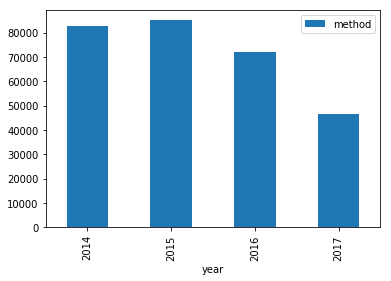



Mass Entry


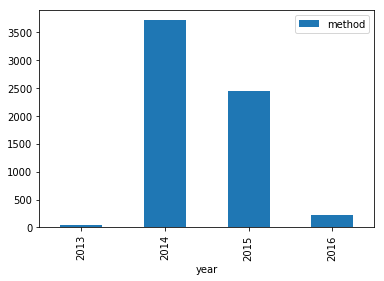



Web


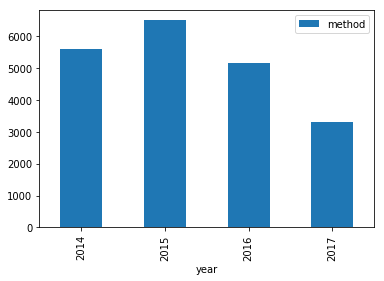



Spot311 Interface


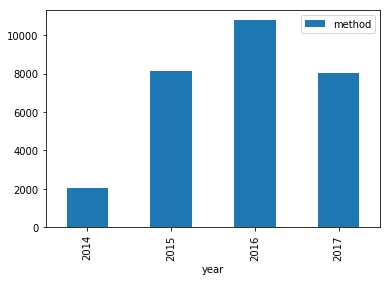



Field Request


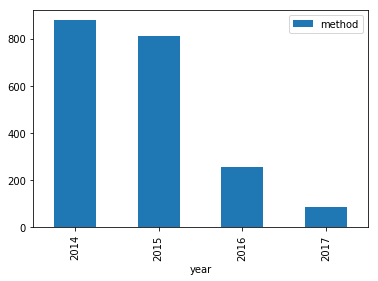



Mobile Devi


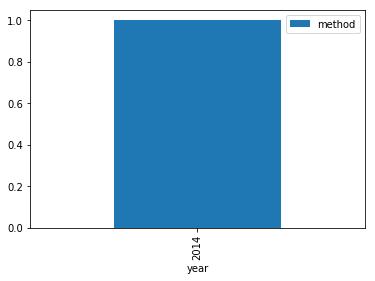



E-Mail


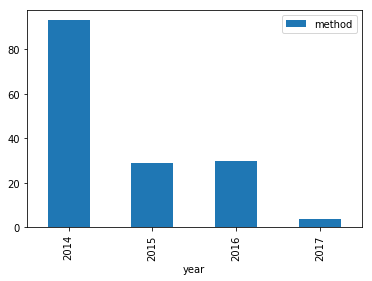



Open311


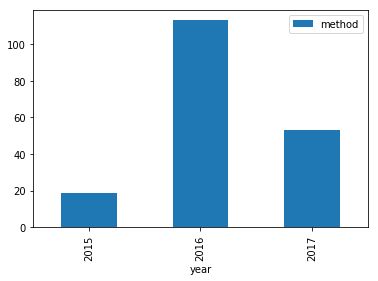



CSR - Follow On SR


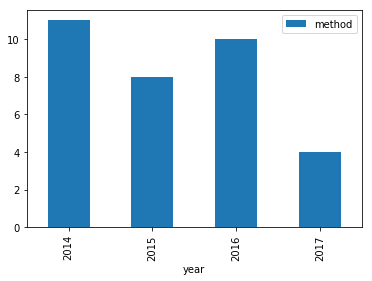



Field Reque


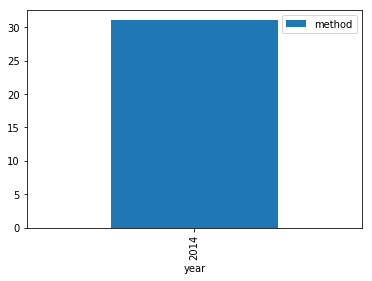



Other


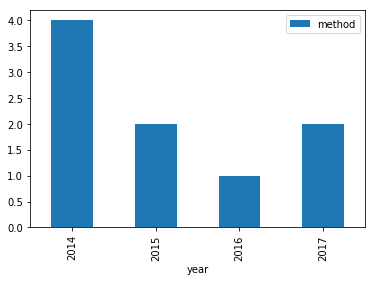



Mail


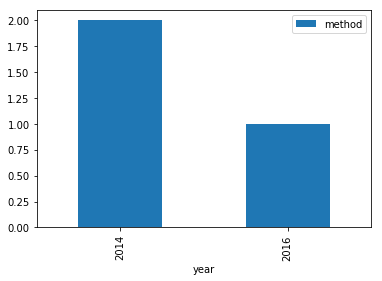



Social Media


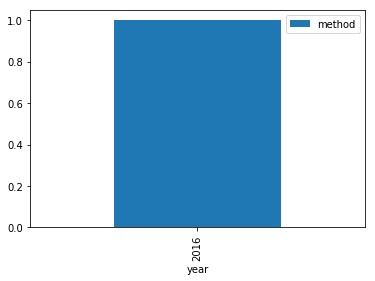



Radio


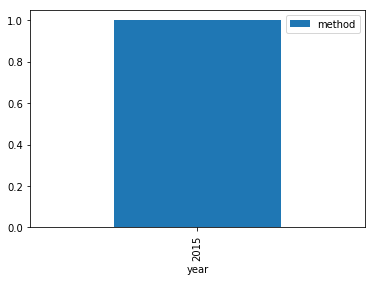



Walk In


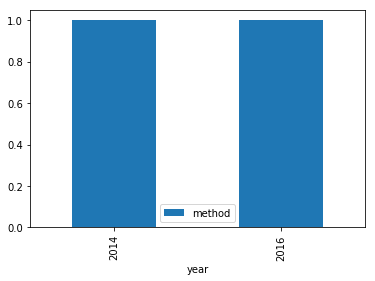



CSR - Follo


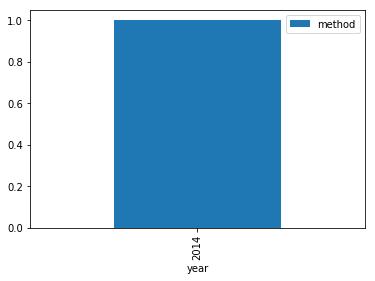



Interface


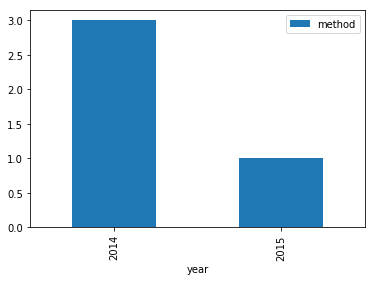

In [97]:
for i in mlist:
    print(i)
    dataframe_collection[i]=table.loc[table["method"]==i].groupby(table["year"]).count().drop("year",axis=1)
    dataframe_collection[i].plot(kind='bar')
    mplt.show()
    print('\n')
del table

** In total, there are 17 methods. Some methods like radio and social media, have almost no case reported through them over 4 years. Austin may consider terminate them and invest resources in popular methods like phone and web.
Field Request and E-Mail usage declined dramatically over years, indicating that Austin may graduately decrease the budget for them. **

# Argument

Here, we want to further explore the seasonal pattern for number of cases. We assume that the pattern is caused by tempreture. So we find the dataset of Austin weather. The dataset collected the weather data from 2013 to 2017. 
https://www.kaggle.com/grubenm/austin-weather/version/2/data


In [99]:
weather = pd.read_csv("https://s3.amazonaws.com/leiwen/dmfa/austin_weather.csv")

In [100]:
from pandas.tseries.offsets import *

In [101]:
weather.Date = pd.to_datetime(weather.Date)+MonthEnd()

In [102]:
weather.Date = weather.Date.apply(lambda x:x.month)

In [103]:
weather.Humidity_avg_percent =pd.to_numeric(weather.Humidity_avg_percent,errors = "coerce")

In [104]:
weather = weather.groupby("Date").mean()

In [105]:
temp = pdsql.read_sql('''
SELECT hour.month_of_year_str, COUNT(*) AS count
FROM facts
JOIN hour ON facts.created_date_key = hour.hour_key
GROUP BY 1,hour.month_of_year
Order By hour.month_of_year;''',conn)
number= {'type' : 'bar',
         "name":"Number of Cases ",
                     'x' : temp.month_of_year_str,
                     'y' : temp["count"],
                     'marker' : {'color' : 'red',
                                'line' : {'color' : '#333',
                                          'width' : 2}},
                     'opacity' : 0.5,}
                     

layout = {'title' : "Number of Case among different months ",
         'xaxis' : {'title' : 'Month'},
         'yaxis' : {'title' : 'Number of cases'},
         }
fig = {'data' : [number],
      'layout' : layout}
number2= {'type' : 'scatter',
          "name":"temperature",
                     'x' : temp.month_of_year_str,
                     'y' : weather["Temp_avg_f"]/weather["Temp_avg_f"].mean()*temp["count"].mean(),
                     'marker' : {'color' : 'blue',
                                'line' : {'color' : '#333',
                                          'width' : 2},},
                      "line":{"smoothing":1.3},
                     'opacity' : 0.5,}

fig = {'data' : [number,number2],
      'layout' : layout}
pyo.iplot(fig)

**From the figure above, we can notice that even though the trend of temperature and number of cases may not exactly matched, but it still has a similar shape. As a result, we believe that the temperature may be one of the reasons that why the number of cases is more in summer, and less in winter.**